多变量线性回归

假设我们要卖房子，但是影响房价的因素有很多，例如人口，房龄，面积等等；所以我们用多变量线性回归来预测房子的房价会比单变量预测的更准确



在上一个文档中做的是单变量线性回归，然后学习了读取文件，查看文件的详情；对文件进行加列；将文件转为矩阵；绘制散点图scatter和曲线图plot;

学习了定义损失函数和梯度下降函数并将它们可视化。

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

这里如果数据文件夹和???在一个文件内就可以用单引号写成
data = pd.read_csv('ex1data2.txt',names=['size','bedrooms','price'])

因为我这里数据文件存在其他文件夹，所以要用双引号读取，且前面要加r

In [6]:
data = pd.read_csv(r"X:BaiduNetdiskDownload\ML_NG\01-linear regression\ex1data2.txt",names=['size','bedrooms','price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


###数据预处理：特征归一化（使损失函数收敛得更快）

一标准归一化（使归一化后特征服从标准正态分布）

二最大最小值归一化

1、使得数据都处于同一量级

2、提示模型精度和收敛速度


这里采用法一进行归一化

In [8]:
def normalize_feature(data):
    return (data-data.mean())/data.std()
data = normalize_feature(data)

In [9]:
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


上表显示的就是进行归一化后的表格数据，我们发现数据就全都在[-1,2]之间，差异已经很小了


data.mean():均值

data.std():方差

方差是衡量数据集中每个数值与均值之间差异程度的一个指标。它是每个数值与均值之差的平方后的平均值。方差越大，说明数据点在均值周围的分布越分散；方差越小，
说明数据点越集中

g构造数据集

1、添加全为1的列

2、构造数据集(切片分离）

3、将dataframe转成数组格式

4、构造损失函数

5、构造梯度下降函数

6、可视化


In [14]:
data.insert(0,'one',1)
data.head()

,one,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [15]:
X = data.iloc[:,0:-1]
X.head()

,one,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [16]:
y = data.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

In [23]:
X = X
X.shape

(47, 3)

转为数组的源代码如下，但是报错：AttributeError: 'numpy.ndarray' object has no attribute 'values'

X = X.values

X.shape

解决方案：去掉“.values”，因为python升级后不需要这一步了，所以直接打印X.shape和y.shape即可
然后下面如果直接调用y=y.reshape(47,1)就会报错说series对象没有reshape属性，所以就需要使用series对象的values属性再reshape重塑矩阵y的行数和列数

y=y.values.reshape(47,1)

In [24]:
y.shape

(47,)

In [26]:
y=y.values.reshape(47,1)

In [27]:
y.shape

(47, 1)

In [ ]:
###损失函数

In [28]:
def costFunction(X,y,theta):
    inner =np.power( X @ theta - y, 2)
    return np.sum(inner) / (2 * len(X))

In [31]:
theta  = np.zeros((3,1))
cost_init = costFunction(X,y,theta)
print(cost_init)

0.48936170212765967


In [ ]:
###梯度下降（采取一系列不同的alpha进行比较）

In [33]:
def gradientDescent(X,y,theta,alpha,iters):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y) ) * alpha / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i % 100 == 0:
            print(cost)
            
    return theta,costs

In [47]:
#（采取一系列不同的alpha进行比较）
candidate_alpha = [0.001,0.002,0.01,0.1,0.004,0.0025]
iters = 2000

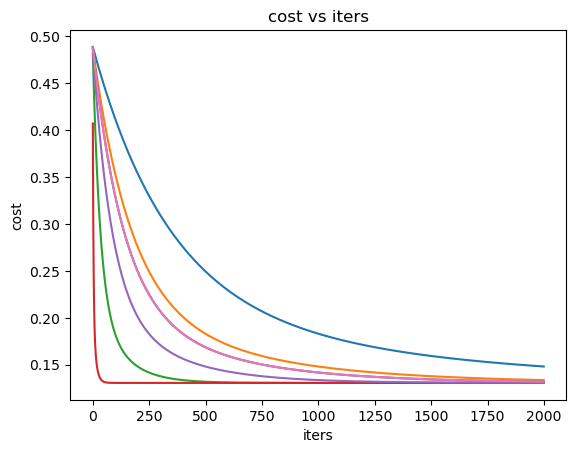

In [48]:
#绘制图形
fig,ax = plt.subplots()

for alpha in candidate_alpha:#从列表中逐个选择不同的alpha
    _,costs=gradientDescent(X,y,theta,alpha,iters) #因为想绘图所以不需要返回theta的值所以这用‘——’替代，
    ax.plot(np.arange(iters),costs)#在一个画面中画出六条曲线
    
ax.plot(np.arange(iters),costs)
ax.set(xlabel='iters',
      ylabel='cost',
      title='cost vs iters')
plt.show()

In [49]:
#这里使用了ax.plot(np.arrange(iters),costs)就报错，然后将arrange改成arange就可以正常运行

In [50]:
###情形2，不打印参数

In [51]:
def gradientDescent(X,y,theta,alpha,iters,isprint=False):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y) ) * alpha / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i % 100 == 0:
            if isprint:
                print(cost)
            
    return theta,costs

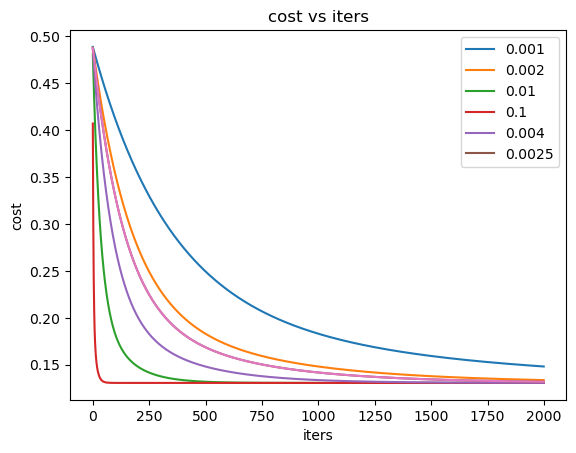

In [52]:
#绘制图形
fig,ax = plt.subplots()

for alpha in candidate_alpha:#从列表中逐个选择不同的alpha
    _,costs=gradientDescent(X,y,theta,alpha,iters) #因为想绘图所以不需要返回theta的值所以这用‘——’替代，
    ax.plot(np.arange(iters),costs,label=alpha)#在一个画面中画出六条曲线,并显示每一条曲线的标签
    ax.legend()
    
ax.plot(np.arange(iters),costs)
ax.set(xlabel='iters',
      ylabel='cost',
      title='cost vs iters')
plt.show()

In [ ]:
#从图中可以看出红绿紫三条曲线的拟合情况较好，

In [ ]:
#可视化

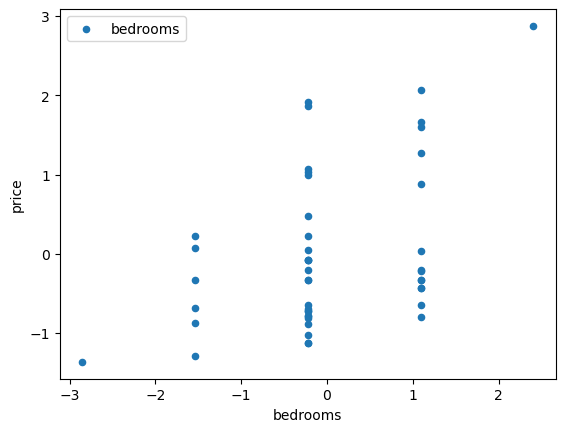

In [10]:
data.plot.scatter('bedrooms','price',label='bedrooms')
plt.show()

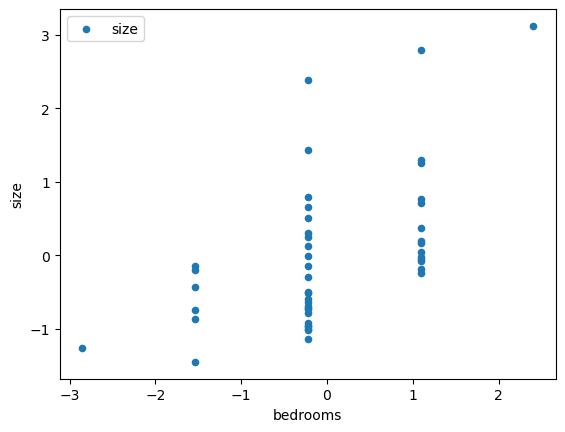

In [13]:
data.plot.scatter('bedrooms','size',label='size')
plt.show()

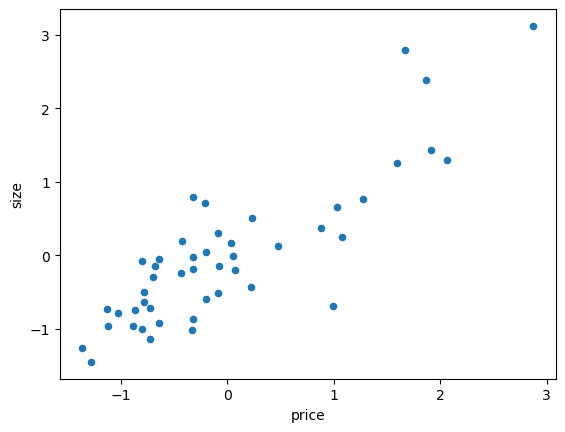

In [12]:
data.plot.scatter('price','size')
plt.show()

In [ ]:
#正规方程

In [53]:
def normalEquation(X,y):
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [54]:
theta = normalEquation(X,y)
print(theta)

[[-1.04083409e-16]
 [ 8.84765988e-01]
 [-5.31788197e-02]]
